# GenerativeAI4DS-I
## Lab. Medical Image Understanding

##  What I hope you'll get out of this lab
* Be aware of the potential of generative AI to process medical images

In [2]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.6 MB/s eta 0:00:00


In [3]:
from IPython.display import display, Image, Audio, HTML

import cv2  # We're using OpenCV to read video, to install !pip install opencv-python
import base64
import time
from openai import OpenAI
import os
import requests

In [4]:
def show_json(obj):
    display(json.loads(obj.model_dump_json()))

In [5]:
# We need this to load the files onto google colab
!git clone https://github.com/thousandoaks/GenerativeAI4DS-I.git

Cloning into 'GenerativeAI4DS-I'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 105 (delta 36), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (105/105), 3.41 MiB | 8.98 MiB/s, done.
Resolving deltas: 100% (36/36), done.


# 1. You have to get your [OpenAI API Key](https://platform.openai.com/account/api-keys)

In [6]:
# Used by the agent in this tutorial
os.environ["OPENAI_API_KEY"] = "YOU-NEED-YOUR-OWN-CODE"

In [11]:
client = OpenAI(
  api_key=os.environ['OPENAI_API_KEY'],  # this is also the default, it can be omitted
)

# 2. Image Understanding
OpenAI has multimedia processing capabilities. In this example we will interpret the information contained in an image to extract information about the employees, their roles, and their managers from the image. We will use function/tool calling to specify the input parameters for the organizational structure, such as the employee name, role, and manager's name and role.


### 2.1. Image Loading
#### First, we load the image from a local repository

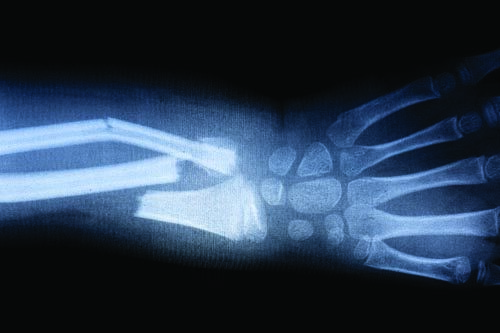

In [7]:
display(Image('/content/GenerativeAI4DS-I/datasets/xray-fracture.jpeg'))

In [8]:
# Function to encode the image as base64
def encode_image(image_path: str):
    # check if the image exists
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

In [9]:
base64_img = encode_image('/content/GenerativeAI4DS-I/datasets/xray-fracture.jpeg')


### 2.2. Image Processing
#### Once we have the image ready, we craft our prompt and send a request to GPT

In [12]:
response = client.chat.completions.create(

    model="gpt-4o",
    messages=[

        {"role": "user", "content": [
            {"type": "text", "text": "Analyze the given medical image and carefully determine the medical condition."},
            {"type": "image_url", "image_url": {
                "url": f"data:image/png;base64,{base64_img}"}
            }
        ]}
    ],
    temperature=0.0,
)

print(response.choices[0].message.content)





The given medical image is an X-ray of a forearm, specifically showing a fracture. The image clearly depicts a break in the radius bone, which is one of the two long bones in the forearm. This type of fracture is commonly referred to as a distal radius fracture. The break appears to be displaced, meaning the bone fragments are not aligned properly.

This type of fracture often occurs due to a fall onto an outstretched hand, which is a common injury mechanism. Treatment typically involves realigning the bone fragments (reduction) and immobilizing the forearm with a cast or splint. In some cases, surgical intervention may be necessary to properly align and stabilize the bone fragments.


In [13]:
display(HTML(response.choices[0].message.content))